In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

In [11]:
def model(p, x):
 return p[0] * (np.sin(p[1]*x)/(p[1]*x))**2+ p[2]    #p es un vector con los parámetros a ajustar

In [12]:
def fun(p, x, y):
 return model(p, x) - y

In [16]:
def jac(p, x, y):   #jacobiano
 J = np.empty((x.size, p.size))
 a= np.sin(p[1]*x)/(p[1]*x)
 J[:, 0] = a**2          #derivada de la función respecto a p[0]
 J[:, 1] = p[0] * 2*a*(np.cos(p[1]*x)*p[1]*x**2-np.sin(p[1]*x)*x)/((p[1]*x)**2)  #derivada de la función respecto a p[1]
 J[:, 2] = 1                        #derivada de la función respecto a p[2]
 return J

In [17]:
#aca es donde hay q poner sus datos, acordarse de restar la intesidad mínima, y centrar el máximo en la posición cero
x=np.array([-20,-18,-16,14,-10,-6,-4,-2,2,3,4,6,12,14,16,18,20])*np.pi/15 #datos de posición, no poner x=0 porque diverge
y=np.array([ 495,  496, 496,  497,  498, 499, 499, 500, 500, 499, 499.89, 499.64,  498.27,  497.61,  496.85,
  496.00,  495.04])  #datos de intensidad
p0 = np.array([400, 0.5*np.pi/180,0]) #semillas de p, tienen que poner unos estimativos, p[0] es inteisdad máxima, p[1] se estima sabiendo q la rendja mide aprox 50 um...

In [18]:
res = least_squares(fun, p0, jac=jac, bounds=(0, 1000), args=(x, y), verbose=1)
print(res.x)   # p optimizado #


`ftol` termination condition is satisfied.
Function evaluations 205, initial cost 8.1413e+04, final cost 1.0923e+00, first-order optimality 3.46e-04.
[  1.44961487e+01   2.52074405e-01   4.85225463e+02]


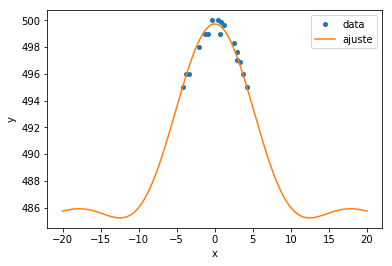

In [19]:
x_ajuste = np.linspace(-20,20,1000)
y_ajuste = model(res.x, x_ajuste)
plt.plot(x, y, 'o', markersize=4, label='data')
plt.plot(x_ajuste, y_ajuste, label='ajuste')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='upper right')
plt.savefig('figura.jpg',dpi=400)
plt.show()